# Coastal Hazard Assessment Project

## Introduction
This notebook documents the process of collecting and analyzing coastal environmental data using a custom Android application. The data is aimed at assessing coastal hazards and includes observations of various sea and plant life as well as beach composition.

### Background
The data was collected using a bespoke Android application designed for this purpose. Users can submit observations of different environmental variables such as types of sea life, beach composition, and other relevant metrics.

<p float="left">
  <img src="./images/app1.jpg" alt="Beach Selection" style="width:200px; margin-right:10px;"/>
  <img src="./images/app2.jpg" alt="Basic Entry" style="width:200px; margin-right:10px;"/>
  <img src="./images/app3.jpg" alt="App3" style="width:200px; margin-right:10px;"/>
  <img src="./images/app4.jpg" alt="App4" style="width:200px;"/>
</p>



### Data Collection
The application allows users to input data while on-site at various beach locations. This data includes geographical coordinates, environmental conditions, and other pertinent observations.

## Data Preprocessing
The collected data is stored in Google Firestore and periodically exported to CSV format for analysis. This section will discuss the process of transforming raw data from Firestore into a structured format suitable for analysis.



In [1]:
#Install necessary libraries
!pip install pandas seaborn matplotlib


## Feature Engineering

In order to facilitate analysis, we will create new metrics based on the collected data:

- **Sea Life Metric**: A composite score reflecting the diversity and abundance of sea life at each location.
- **Plant Life Metric**: A similar composite score for plant life.
- **Beach Composition Index**: An index representing the composition of the beach based on the proportions of sand, pebbles, rocks, and boulders.



In [2]:

import pandas as pd

data = pd.read_csv('data.csv')  # Update this with the current CSV file
data.head()


,ID,Latitude,Longitude,Geohash,Description,Name,Timestamp,Image,Thumbnail,Anemones,...,Pebbles,Rocks,Sand,Seaweed Beach,Seaweed Rocks,Snails,Stone,Trees,Width,Windy
0,0,0.000000,0.000000,0,0,0,0,0,0,7,...,5,5,5,5,5,7,5,5,0,2
1,0EUZxU9AZZgKbihLplxM,49.194458,-123.857586,c0xzve9dmpdh,Beautiful sandy beach in horseshoe shaped bay.,Gabriola Sands,5/25/2017 7:51:50,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,1,...,1,1,5,1,4,1,1,4,113,1
2,0Owxe0t8nM1T2ZPxyCQb,50.311615,-115.856252,c2vw5wun3,small sandy beach along the Columbia River whe...,Columbia River drop in,02/26/2024 14:34:44,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,1,...,1,1,5,1,1,1,1,1,3,0
3,0hX0mIVpPz44k3GAW2hP,44.729417,-124.058323,9pzy2yxrxx9t,Veeery shallow sandy paradise,Beverly Beach,4/23/2019 10:28:42,https://firebasestorage.googleapis.com/v0/b/be...,1,1,...,1,2,5,1,2,1,1,1,600,1
4,0jcxDbr97u2n70vTkKIG,51.197903,-115.484798,c3jgk0693hv7,Tiny quiet beach with lots of paddleboards goi...,Johnson Party Beach,6/4/2023 13:23:47,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,1,...,2,1,1,1,1,1,1,1,5,3


In [10]:
# Feature Engineering
# Import necessary libraries
import pandas as pd

# Feature Engineering
# Sea Life Metric: Average of Anemones, Barnacles, Mussels, Oysters, Snails
data['Sea_Life_Metric'] = data[['Anemones', 'Barnacles', 'Mussels', 'Oysters', 'Snails']].mean(axis=1)

# Plant Life Metric: Since we have no specific plant data, we can assume it as zero or modify accordingly
# Assuming zero for now. If there are specific columns to be used, they can be added here.
data['Plant_Life_Metric'] = data[['Seaweed Rocks', 'Seaweed Beach']].mean(axis=1)

# Composition Index: Average of Sand, Pebbles, Rocks, Stone
# Adjust weights (-1 for Sand, 1 for Rocks and Boulders) based on specific needs and scale
data['Composition_Index'] = (-1 * data['Sand']) + (-1 * data['Pebbles']) + (1 * data['Rocks']) + (1 * data['Boulders'])


# Display the first few rows of the updated dataframe
data.head()


,ID,Latitude,Longitude,Geohash,Description,Name,Timestamp,Image,Thumbnail,Anemones,...,Seaweed Beach,Seaweed Rocks,Snails,Stone,Trees,Width,Windy,Sea_Life_Metric,Plant_Life_Metric,Composition_Index
0,0,0.000000,0.000000,0,0,0,0,0,0,7,...,5,5,7,5,5,0,2,7.0,5.0,0
1,0EUZxU9AZZgKbihLplxM,49.194458,-123.857586,c0xzve9dmpdh,Beautiful sandy beach in horseshoe shaped bay.,Gabriola Sands,5/25/2017 7:51:50,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,1,...,1,4,1,1,4,113,1,1.0,2.5,-4
2,0Owxe0t8nM1T2ZPxyCQb,50.311615,-115.856252,c2vw5wun3,small sandy beach along the Columbia River whe...,Columbia River drop in,02/26/2024 14:34:44,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,1,...,1,1,1,1,1,3,0,1.0,1.0,-3
3,0hX0mIVpPz44k3GAW2hP,44.729417,-124.058323,9pzy2yxrxx9t,Veeery shallow sandy paradise,Beverly Beach,4/23/2019 10:28:42,https://firebasestorage.googleapis.com/v0/b/be...,1,1,...,1,2,1,1,1,600,1,1.0,1.5,-3
4,0jcxDbr97u2n70vTkKIG,51.197903,-115.484798,c3jgk0693hv7,Tiny quiet beach with lots of paddleboards goi...,Johnson Party Beach,6/4/2023 13:23:47,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,1,...,1,1,1,1,1,5,3,1.0,1.0,-1


Visual Analysis: Sea Life Distribution

The first part of our analysis focuses on the distribution of sea life across different coastal areas. By visualizing this data, we aim to identify patterns and areas of rich biodiversity, which are crucial for maintaining ecological balance and supporting marine life. The scatter plot below, combined with a regression line, illustrates the relationship between different areas and their sea life diversity.

Interpretation: [Here, describe what the scatter plot and regression line reveal about sea life distribution and any patterns or outliers you observe.]

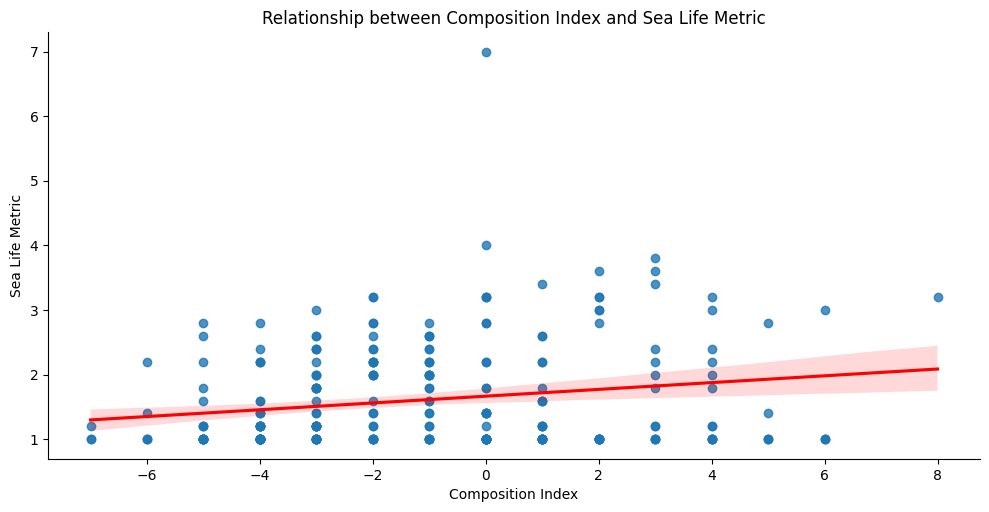

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x='Composition_Index', y='Sea_Life_Metric', data=data, aspect=2, line_kws={'color': 'red'})
plt.title('Relationship between Composition Index and Sea Life Metric')
plt.xlabel('Composition Index')
plt.ylabel('Sea Life Metric')
plt.show()


Visual Analysis: Plant Life Distribution

Next, we examine the distribution of plant life along the coast. Similar to our analysis of sea life, this visualization helps us identify areas with rich plant biodiversity, which can indicate healthy coastal ecosystems. The scatter plot and regression line below show how plant life varies across different regions.

Interpretation: [Here, describe what the scatter plot and regression line reveal about plant life distribution and any notable trends or deviations.]

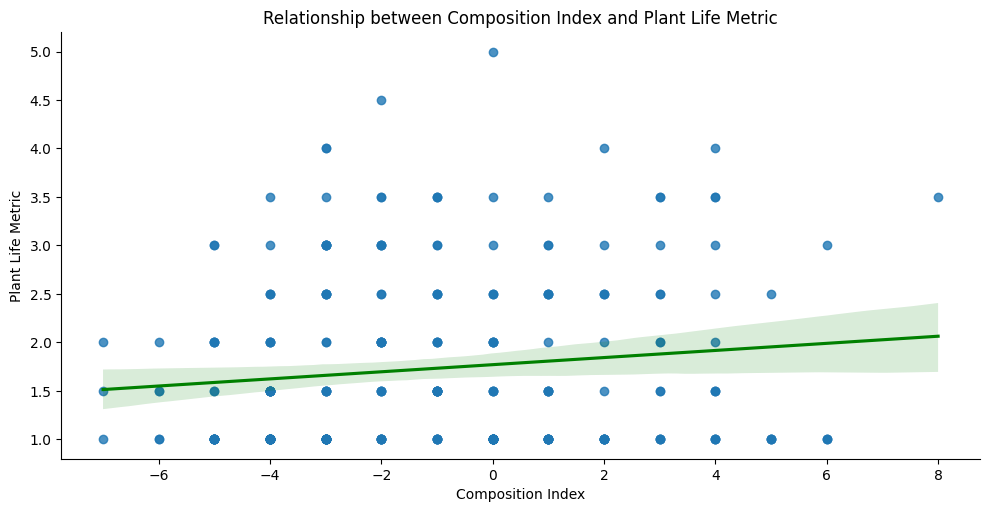

In [12]:
# Scatter plot with regression line
sns.lmplot(x='Composition_Index', y='Plant_Life_Metric', data=data, aspect=2, line_kws={'color': 'green'})
plt.title('Relationship between Composition Index and Plant Life Metric')
plt.xlabel('Composition Index')
plt.ylabel('Plant Life Metric')
plt.show()


Visual Analysis: Composition Index

We also developed a Composition Index to quantify the physical makeup of the beach, including the presence of sand, pebbles, rocks, and boulders. This index can help us understand how the beach's physical characteristics might contribute to coastal erosion or habitat stability. The scatter plot below shows the relationship between the Composition Index and various coastal areas.

Interpretation: [Here, explain the implications of the Composition Index values, any correlations with other features, and what this means for coastal health.]

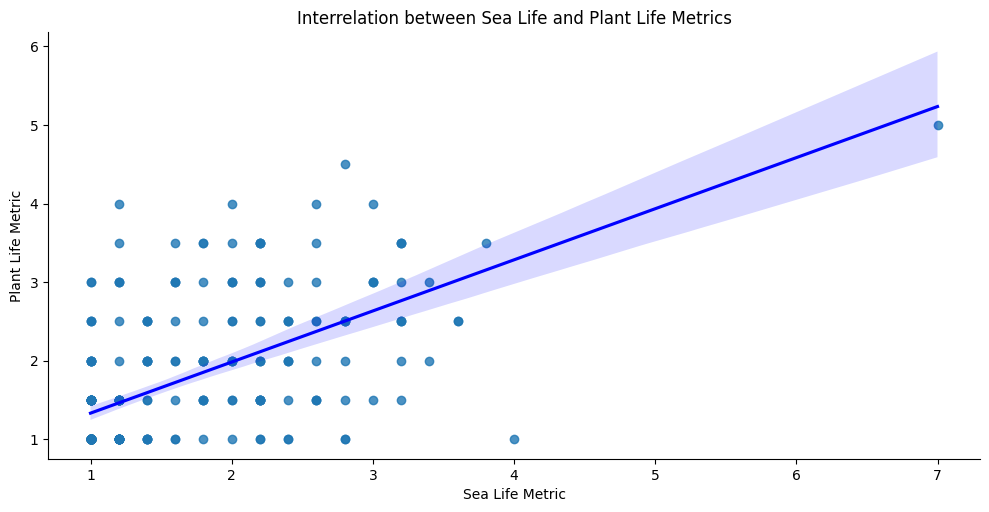

In [13]:
# Scatter plot with regression line
sns.lmplot(x='Sea_Life_Metric', y='Plant_Life_Metric', data=data, aspect=2, line_kws={'color': 'blue'})
plt.title('Interrelation between Sea Life and Plant Life Metrics')
plt.xlabel('Sea Life Metric')
plt.ylabel('Plant Life Metric')
plt.show()


Conclusion and Recommendations

Based on our visual analyses and feature engineering, we can draw several conclusions about coastal health and hazards. Areas with higher biodiversity in sea life and plant life tend to indicate healthier ecosystems. However, the physical composition of the beaches also plays a critical role in determining their vulnerability to erosion and other hazards.

Recommendations: [Here, provide recommendations based on your findings, such as conservation efforts, further studies needed, or policy suggestions.]